In [63]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

import torch

In [17]:
# load video mp4 file
cap = cv2.VideoCapture('data/sample.mp4')

# get the first frame
ret, frame = cap.read()

# convert frame into grayscale
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# convert frame into np array
image = np.array(frame)

In [12]:
image.shape

(720, 1280)

(720, 1280, 3) (720, 1280, 3)


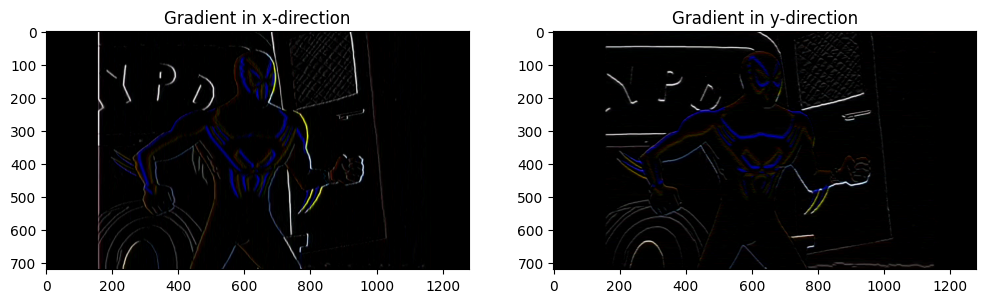

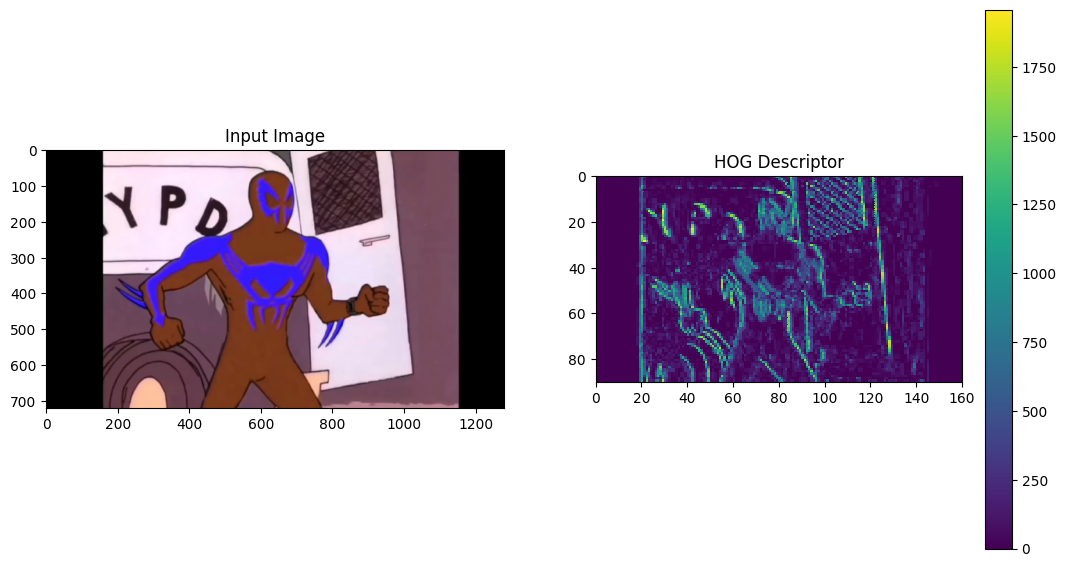

In [35]:
# Define the gradient kernels for 3D convolution 
dx = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]])

dy = np.array([[-1, -1, -1],
                [0, 0, 0],
                [1, 1, 1]])

# Compute the image gradients
gradient_x = cv2.filter2D(image, -1, dx)
gradient_y = cv2.filter2D(image, -1, dy)

print(gradient_x.shape, gradient_y.shape)

plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(gradient_x, cmap='gray')
plt.title('Gradient in x-direction')

plt.subplot(122)
plt.imshow(gradient_y, cmap='gray')
plt.title('Gradient in y-direction')
plt.show()

# Calculate gradient magnitude and orientation
magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
orientation = np.arctan2(gradient_y, gradient_x) * 180 / np.pi  # Convert to degrees

# Define the number of histogram bins and their range
num_bins = 9
bin_range = (0, 180)

# Initialize an array to store the HOG descriptor
hog_descriptor = np.zeros((image.shape[0] // 8, image.shape[1] // 8, num_bins))

# Create histograms for each cell in the image
cell_size = 8 # define the cell size

for i in range(0, image.shape[0], cell_size):
    for j in range(0, image.shape[1], cell_size):
        cell_magnitude = magnitude[i:i+cell_size, j:j+cell_size]
        cell_orientation = orientation[i:i+cell_size, j:j+cell_size]
        histogram = np.histogram(cell_orientation, bins=num_bins, range=bin_range, weights=cell_magnitude)[0]
        hog_descriptor[i//cell_size, j//cell_size, :] = histogram

# Normalize the HOG descriptor
block_size = 2 
eps = 1e-6 # replace 0 with a small number

for i in range(hog_descriptor.shape[0] - block_size + 1):
    for j in range(hog_descriptor.shape[1] - block_size + 1):
        block = hog_descriptor[i:i+block_size, j:j+block_size, :].flatten()
        block /= np.sqrt(np.linalg.norm(block) ** 2 + eps)


# plot image and hog descriptor
plt.figure(figsize=(13, 7))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Input Image')

plt.subplot(122)
plt.pcolor(hog_descriptor[:, :, 0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')

plt.title('HOG Descriptor')
plt.colorbar()
plt.show()


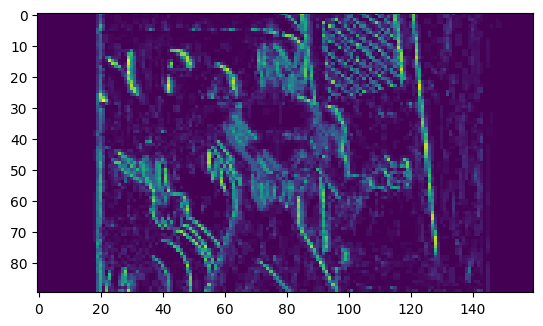

In [53]:
plt.imshow(hog_descriptor[:, :, 0])

In [43]:
hog_descriptor.shape

(90, 160, 9)

In [88]:

def applyHOG(path = 'data/sample.mp4'):
    
    # Define the gradient kernels for 3D convolution 
    dx = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

    dy = np.array([[-1, -1, -1],
                    [0, 0, 0],
                    [1, 1, 1]])

    # load video mp4 file
    cap = cv2.VideoCapture(path)

    video = []
    
    counter = 0

    while True:
        # get the first frame
        ret, frame = cap.read()
        
        if not ret:
            break

        if counter % 2 == 0:
            # convert frame into grayscale
            # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # convert frame into np array
            image = np.array(frame)
            
            # Compute the image gradients
            gradient_x = cv2.filter2D(image, -1, dx)
            gradient_y = cv2.filter2D(image, -1, dy)

            # Calculate gradient magnitude and orientation
            magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
            orientation = np.arctan2(gradient_y, gradient_x) * 180 / np.pi  # Convert to degrees

            # Define the number of histogram bins and their range
            # num_bins = 9
            num_bins = 1
            bin_range = (0, 180)

            # Initialize an array to store the HOG descriptor
            hog_descriptor = np.zeros((image.shape[0] // 8, image.shape[1] // 8, num_bins))

            # Create histograms for each cell in the image
            cell_size = 8 # define the cell size

            for i in range(0, image.shape[0], cell_size):
                for j in range(0, image.shape[1], cell_size):
                    cell_magnitude = magnitude[i:i+cell_size, j:j+cell_size]
                    cell_orientation = orientation[i:i+cell_size, j:j+cell_size]
                    histogram = np.histogram(cell_orientation, bins=num_bins, range=bin_range, weights=cell_magnitude)[0]
                    hog_descriptor[i//cell_size, j//cell_size, :] = histogram

            # Normalize the HOG descriptor
            block_size = 2 
            eps = 1e-6 # replace 0 with a small number

            for i in range(hog_descriptor.shape[0] - block_size + 1):
                for j in range(hog_descriptor.shape[1] - block_size + 1):
                    block = hog_descriptor[i:i+block_size, j:j+block_size, :].flatten()
                    block /= np.sqrt(np.linalg.norm(block) ** 2 + eps)
                    
            video.append(hog_descriptor[:, :, 0])
            
        counter += 1 # skip one frame out of two
        
    # convert video into np array
    video = np.array(video)
    
    # save numpy array
    np.save('data/hog.npy', video)
    
    # # save video in mp4 format
    # # Define the codec and create VideoWriter object
    # out = cv2.VideoWriter('data/output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, (video.shape[2],video.shape[1]))

    # for i in range(video.shape[0]):
    #     # write the flipped frame
    #     out.write(video[i])

    # # Release everything if job is finished
    # out.release()
    # cap.release()
    
    # print('Video saved in data/output.mp4')
    
    return video



In [89]:
video = applyHOG()

In [96]:
video = np.load('data/hog.npy')
print(video.shape)

# save all the images
for i in range(video.shape[0]):
    if i < 10:
        plt.imsave('data/hog_images/hog_00' + str(i) + '.png', video[i])
    elif i < 100:
        plt.imsave('data/hog_images/hog_0' + str(i) + '.png', video[i])
    elif i < 1000:
        plt.imsave('data/hog_images/hog_' + str(i) + '.png', video[i])
        
print('Images saved in data/hog_images/')

(126, 90, 160)
Images saved in data/hog_images/


In [97]:
import glob 

path = glob.glob('data/hog_images/*.png')

# merge all the images into a video
img_array = []
for filename in path:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    
out = cv2.VideoWriter('data/hog_video.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()



OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
